# Import Data

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

random_state = 3

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Boosting_data = pd.read_csv("Data/BoostingData.csv")
Boosting_data

,Index,DT,Energy,Month,DayOfWeek,BankHols,RetailHols,Trend2010,AvgDB,LagDB,Lag2DB,AvgClouds,AvgWind
0,0,1/1/17,242.69,1.0,7.0,0.0,0.0,7.00,46.77,36.66,36.72,4.39,5.24
1,1,1/2/17,257.06,1.0,1.0,0.0,0.0,7.01,45.10,46.77,36.66,8.00,5.66
2,2,1/3/17,265.35,1.0,2.0,0.0,0.0,7.01,45.37,45.10,46.77,7.75,5.63
3,3,1/4/17,253.79,1.0,3.0,0.0,0.0,7.01,48.87,45.37,45.10,3.71,8.61
4,4,1/5/17,305.91,1.0,4.0,0.0,0.0,7.01,34.49,48.87,45.37,6.06,3.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,12/27/19,262.49,12.0,5.0,0.0,0.0,9.99,47.83,43.47,39.38,3.76,2.08
1091,1091,12/28/19,238.96,12.0,6.0,0.0,0.0,9.99,51.19,47.83,43.47,1.86,1.76
1092,1092,12/29/19,240.27,12.0,7.0,0.0,0.0,9.99,53.24,51.19,47.83,7.78,3.33
1093,1093,12/30/19,235.10,12.0,1.0,0.0,0.0,10.00,62.12,53.24,51.19,3.87,9.17


In [3]:
Boosting_data = pd.read_csv("Data/BoostingData.csv")

X = Boosting_data.values[:,3:]
y = Boosting_data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train = np.asarray(X_train.astype("float32"))
X_test = np.asarray(X_test.astype("float32"))

In [4]:
def mape(pred, test):
    return np.mean(np.abs((test - pred) / test))

# Predicting Energy Values

In [5]:
base_bdt = XGBRegressor(n_estimators=100,max_depth=3,learning_rate=0.1,colsample_bytree=0.8, subsample=0.8)
base_bdt.fit(X_train, y_train)
base_preds_bdt = base_bdt.predict(X_test)

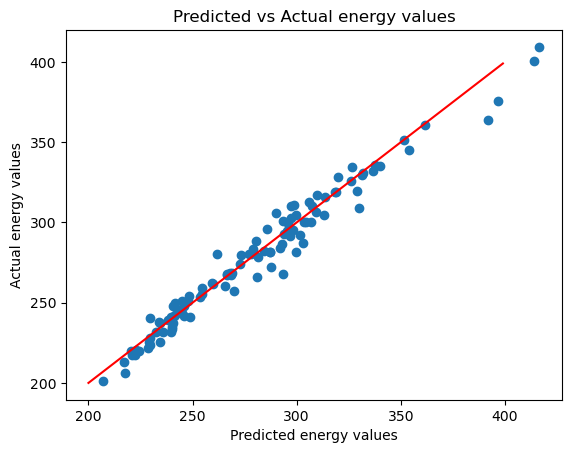

0.020763772086307888

In [6]:
plt.scatter(base_preds_bdt, y_test)
plt.plot(np.arange(200, 400), np.arange(200,400), color =  "r")
plt.xlabel('Predicted energy values') 
plt.ylabel('Actual energy values')
plt.title("Predicted vs Actual energy values")
plt.show()

mape(base_preds_bdt, y_test)

# Predicting Residuals

In [7]:
depths = [3, 5, 7, 10, 12, 15]

for depth in depths:
    bdt = XGBRegressor(n_estimators = 100, max_depth = depth, learning_rate = 0.1,
                   colsample_bytree = 0.8, subsample = 0.8)
    bdt.fit(X_train, y_train)
    preds_bdt = bdt.predict(X_test)
    mape_depth = mape(preds_bdt, y_test)
    print(f'max depth = {depth}, mape = {mape_depth}')


max depth = 3, mape = 0.020763772086307888
max depth = 5, mape = 0.017539756027178107
max depth = 7, mape = 0.018547512656518134
max depth = 10, mape = 0.019884534190285054
max depth = 12, mape = 0.02024089383787254
max depth = 15, mape = 0.02079801633583964


In [8]:
numbers = [50, 100, 200, 500, 1000, 2000, 5000]

for n in numbers:
    bdt = XGBRegressor(n_estimators = n, max_depth = 5, learning_rate = 0.1,
                   colsample_bytree = 0.8, subsample = 0.8)
    bdt.fit(X_train, y_train)
    preds_bdt = bdt.predict(X_test)
    mape_n = mape(preds_bdt, y_test)
    print(f'n_estimators = {n}, mape = {mape_n}')


n_estimators = 50, mape = 0.01998501706409884
n_estimators = 100, mape = 0.017539756027178107
n_estimators = 200, mape = 0.016631839027630435
n_estimators = 500, mape = 0.01629690666002757
n_estimators = 1000, mape = 0.016287615665257396
n_estimators = 2000, mape = 0.016289260290080296
n_estimators = 5000, mape = 0.01628931060559674


In [9]:
rates = [0.01, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25]

for rate in rates:
    bdt = XGBRegressor(n_estimators = 1000, max_depth = 5, learning_rate = rate,
                   colsample_bytree = 0.8, subsample = 0.8)
    bdt.fit(X_train, y_train)
    preds_bdt = bdt.predict(X_test)
    mape_rate = mape(preds_bdt, y_test)
    print(f'learning_rate = {rate}, mape = {mape_rate}')

learning_rate = 0.01, mape = 0.01704363698598451
learning_rate = 0.05, mape = 0.0159410041822256
learning_rate = 0.075, mape = 0.016563973902814763
learning_rate = 0.1, mape = 0.016287615665257396
learning_rate = 0.15, mape = 0.017492486397434334
learning_rate = 0.2, mape = 0.01806229917158679
learning_rate = 0.25, mape = 0.017605756816053406


In [10]:
by_tree = [0.5, 0.6, 0.7, 0.8, 0.9]

for val in by_tree:
    bdt = XGBRegressor(n_estimators = 1000, max_depth = 5, learning_rate = 0.05,
                   colsample_bytree = val, subsample = 0.8)
    bdt.fit(X_train, y_train)
    preds_bdt = bdt.predict(X_test)
    mape_val = mape(preds_bdt, y_test)
    print(f'colsample_bytree = {val}, mape = {mape_val}')

colsample_bytree = 0.5, mape = 0.016997962269537998
colsample_bytree = 0.6, mape = 0.014951716286327658
colsample_bytree = 0.7, mape = 0.015694621720650316
colsample_bytree = 0.8, mape = 0.0159410041822256
colsample_bytree = 0.9, mape = 0.01577698662340698


In [11]:
subsamples = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

for sub in subsamples:
    bdt = XGBRegressor(n_estimators = 1000, max_depth = 5, learning_rate = 0.05,
                   colsample_bytree = 0.6, subsample = sub)
    bdt.fit(X_train, y_train)
    preds_bdt = bdt.predict(X_test)
    mape_sub = mape(preds_bdt, y_test)
    print(f'subsample = {sub}, mape = {mape_sub}')

subsample = 0.5, mape = 0.0151238377461741
subsample = 0.6, mape = 0.014804042717233581
subsample = 0.7, mape = 0.014795627909935757
subsample = 0.8, mape = 0.014951716286327658
subsample = 0.9, mape = 0.01576126371738724
subsample = 0.95, mape = 0.015920256620994628


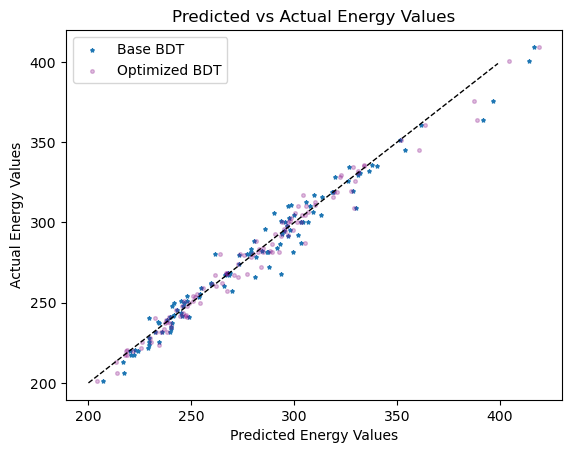

0.015078094013748787


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = random_state)
X_train = np.asarray(X_train.astype("float32"))
X_test = np.asarray(X_test.astype("float32"))

bdt = XGBRegressor(n_estimators = 1000, max_depth = 5, learning_rate = 0.1,
                   colsample_bytree = 0.6, subsample = 0.7)
bdt.fit(X_train, y_train)
preds_bdt = bdt.predict(X_test)

plt.scatter(base_preds_bdt, y_test, s = 7, marker = '*', label = 'Base BDT')
plt.scatter(preds_bdt, y_test, s = 7, label = 'Optimized BDT', color = 'purple', alpha = 0.25)
plt.plot(np.arange(200, 400), np.arange(200,400), '--', color =  "k", lw = 1)
plt.xlabel('Predicted Energy Values') 
plt.ylabel('Actual Energy Values')
plt.title("Predicted vs Actual Energy Values")
plt.legend()
plt.savefig('optimized_base_bdt.png')
plt.show()

print(mape(preds_bdt, y_test))

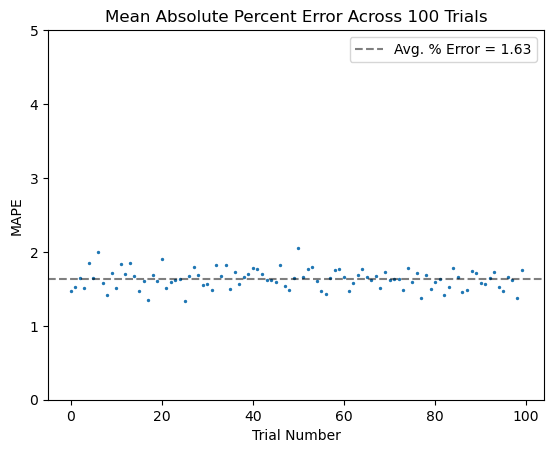

In [13]:
mapes = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)
    X_train = np.asarray(X_train.astype("float32"))
    X_test = np.asarray(X_test.astype("float32"))
    bdt = XGBRegressor(n_estimators = 1000, max_depth = 5, learning_rate = 0.1,
                   colsample_bytree = 0.6, subsample = 0.7)
    bdt.fit(X_train, y_train)
    preds_bdt = bdt.predict(X_test)
    mapes.append(mape(preds_bdt, y_test))
#     print(f'iteration {i}, mse = {mse_i}')

plt.scatter(list(range(100)), np.array(mapes) * 100, s = 2)
plt.axhline(np.mean(np.array(mapes) * 100), linestyle = '--', color = 'black', alpha = 0.5, 
            label = f'Avg. % Error = {np.round(np.mean(np.array(mapes) * 100), 2)}')
plt.ylim([0, 5])
plt.xlabel('Trial Number')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percent Error Across 100 Trials')
plt.legend()
plt.savefig('Plots/boosting_cv_test_mapes.png')
plt.show()

## Optimize Parameters